<a href="https://colab.research.google.com/github/SiddhiNKabra/LP-5/blob/main/dl1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [1]:
!pip install tensorflow

In [3]:
df = pd.read_csv('boston_housing_data.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.isnull().any()

,0
CRIM,True
ZN,True
INDUS,True
CHAS,True
NOX,False
RM,False
AGE,True
DIS,False
RAD,False
TAX,False


In [6]:
df = df.fillna(df.mean())
df.isnull().any()

,0
CRIM,False
ZN,False
INDUS,False
CHAS,False
NOX,False
RM,False
AGE,False
DIS,False
RAD,False
TAX,False


In [7]:
x = df.drop('MEDV', axis=1)
y = df['MEDV']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
model =  Sequential()

# input, hidden & output layer
model.add(Dense(64, input_dim = x_train.shape[1], activation='relu'))  # input_dim sets the no. of input features (columns)
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    x_train, y_train,
    epochs = 300,
    batch_size =  16,
    validation_split = 0.1,
    verbose = 1)


Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 630.9135 - mae: 22.9709 - val_loss: 535.9657 - val_mae: 21.5674
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 520.7823 - mae: 20.6772 - val_loss: 456.9286 - val_mae: 19.7623
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 443.0624 - mae: 19.0566 - val_loss: 344.6880 - val_mae: 16.8899
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 317.4005 - mae: 15.5423 - val_loss: 209.4051 - val_mae: 12.6206
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 195.5673 - mae: 11.5230 - val_loss: 110.9210 - val_mae: 8.2498
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121.9361 - mae: 8.8321 - val_loss: 65.1283 - val_mae: 5.6419
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.1564 - mae: 6.3167 - val_loss: 46.2045 - val_mae: 4.3189
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.6286 - mae: 5.0619 - val_loss: 38.9954 - val_mae: 3.7494
Epoch 9/300
23/23 ━━━━━━━━━

In [12]:
test_mse, test_mae = model.evaluate(x_test, y_test, verbose = 1)
rmse = np.sqrt(test_mse)
print('MSE on test data: ', rmse)
print('MSE on test data: ', test_mse)
print('MAE on test data: ', test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 9.0794 - mae: 2.0723
MSE on test data:  3.528059606900619
MSE on test data:  12.44720458984375
MAE on test data:  2.2385942935943604


In [13]:
y_pred = model.predict(x_test)

# compare first few predictions with actual values
print('\nPredicted vs. Actual')
for i in range(5):
    print('Predicted: ', y_pred[i][0], '| Actual: ', y_test.iloc[i])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

Predicted vs. Actual
Predicted:  27.046873 | Actual:  23.6
Predicted:  35.947342 | Actual:  32.4
Predicted:  16.594913 | Actual:  13.6
Predicted:  23.450556 | Actual:  22.8
Predicted:  14.510678 | Actual:  16.1


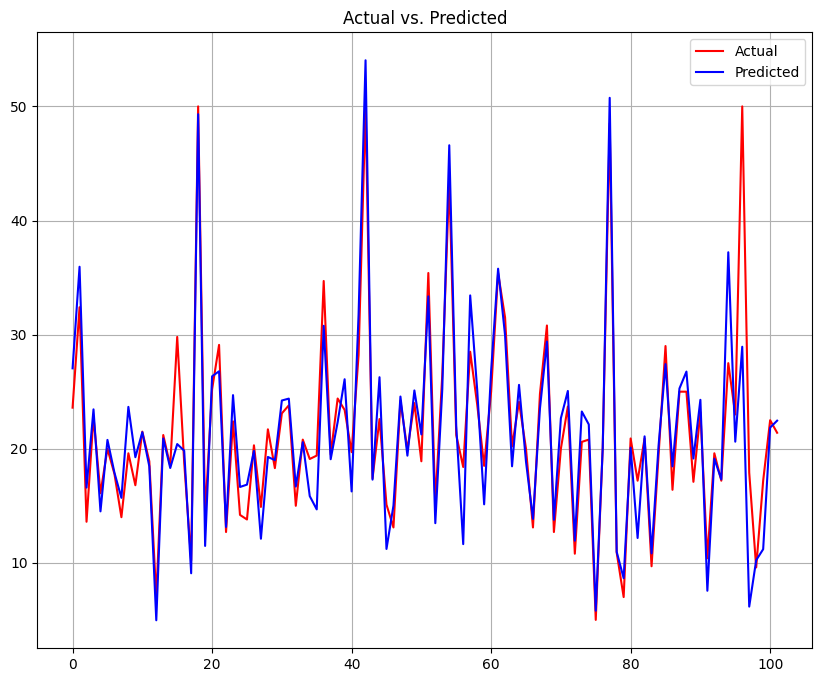

In [14]:
import matplotlib.pyplot as plt

# reshape to 2D array
y_test = np.array(y_test).reshape(-1, 1)

plt.figure(figsize=(10, 8))
plt.plot(y_test, label='Actual', color='red')
plt.plot(y_pred, label='Predicted', color='blue')
plt.title('Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()